<a href="https://colab.research.google.com/github/komo135/forex-prediction/blob/master/ipynb/gan/id_cgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google ドライブをマウントするには、このセルを実行してください。
from google.colab import drive
drive.mount('/content/drive')

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My Drive
%tensorflow_version 2.x
import tensorflow as tf
from distutils.dir_util import copy_tree
from IPython.display import clear_output
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
try:
  import imp
  imp.reload(id_cgan)
except:
  import id_cgan

/content/drive/My Drive


In [0]:
# x = np.load("image_x.npy")
x = np.load("image_time_x.npy")

for i in range(4):
  # x[:,:,i] = (x[:,:,i] - np.min(x[:,:,i], -1).reshape((-1,1))) / (np.max(x[:,:,i], -1) - np.min(x[:,:,i], -1)).reshape((-1,1))
  x[:,:,i] = (x[:,:,i] - np.mean(x[:,:,i], -1).reshape((-1,1))) / np.std(x[:,:,i], -1).reshape((-1,1))
y = np.load("image_y.npy")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
model = id_cgan.Model()
model.load_weights("id_cgan")
model.d_opt = tf.keras.optimizers.Adam(1e-4, 0.5)
model.g_opt = tf.keras.optimizers.Adam(2e-4, 0.5)

80142336/80134624 [==============================] - 1s 0us/step


tf.Tensor([0.35206628 0.41846406 0.0924687 ], shape=(3,), dtype=float32)


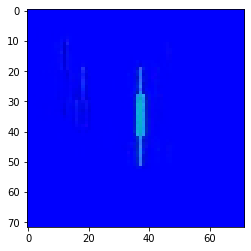

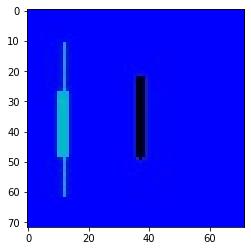

tf.Tensor([-0.29142633 -0.37399295 -0.09527829], shape=(3,), dtype=float32)


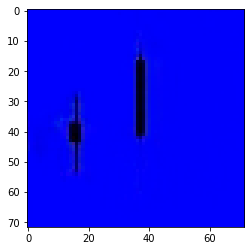

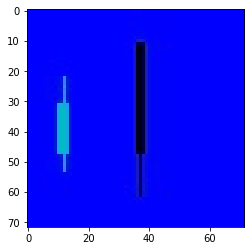

tf.Tensor([-0.01691701  0.26747     0.04207681], shape=(3,), dtype=float32)


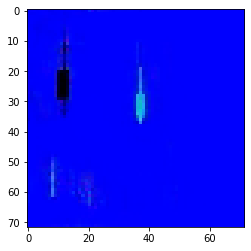

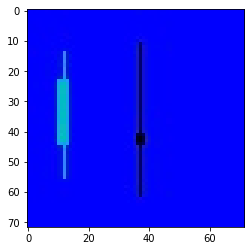

tf.Tensor([ 0.24181719 -0.1724146  -0.07929903], shape=(3,), dtype=float32)


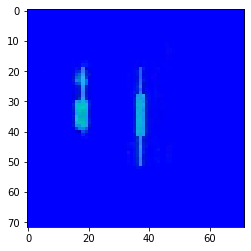

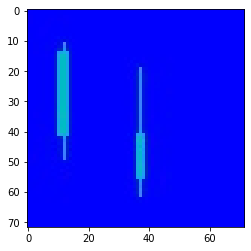

tf.Tensor([-0.29133037  0.08285512  0.26851895], shape=(3,), dtype=float32)


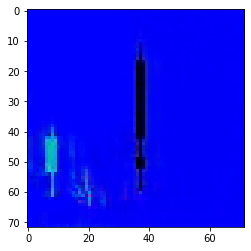

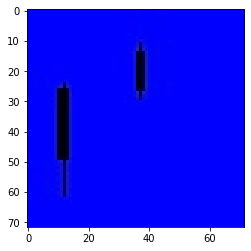

tf.Tensor([ 0.232759   -0.08442855 -0.361089  ], shape=(3,), dtype=float32)


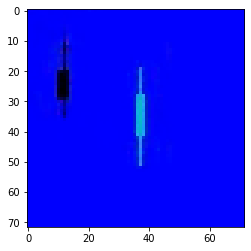

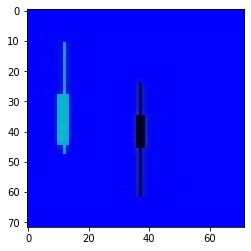

tf.Tensor([-0.16794273  0.1701051   0.26638526], shape=(3,), dtype=float32)


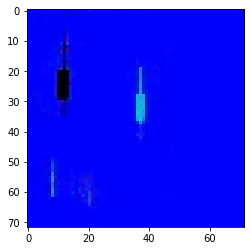

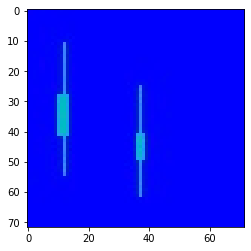

tf.Tensor([ 0.04280838 -0.21129389 -0.13457045], shape=(3,), dtype=float32)


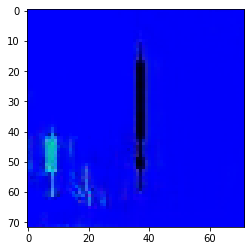

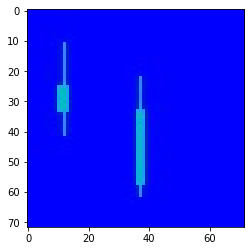

tf.Tensor([0.05581906 0.17307061 0.04140883], shape=(3,), dtype=float32)


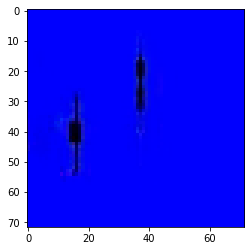

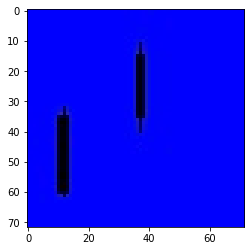

tf.Tensor([-0.07979192 -0.23663345  0.04979094], shape=(3,), dtype=float32)


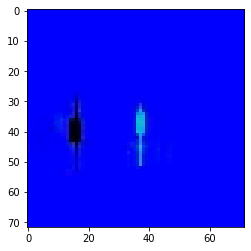

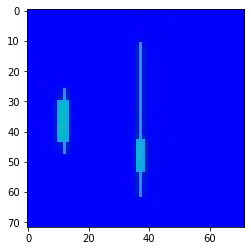

tf.Tensor([ 0.07998936  0.28354248 -0.08685169], shape=(3,), dtype=float32)


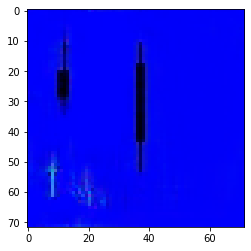

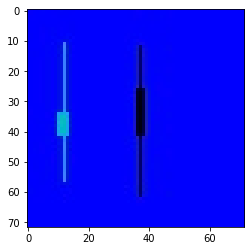

tf.Tensor([-0.07153676 -0.22241203 -0.03609401], shape=(3,), dtype=float32)


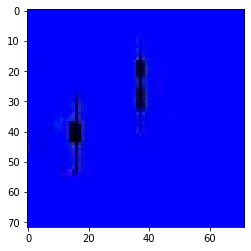

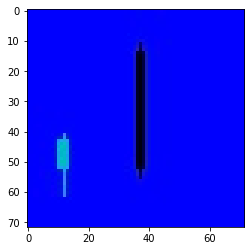

tf.Tensor([0.04610861 0.18438098 0.26588586], shape=(3,), dtype=float32)


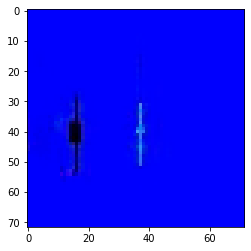

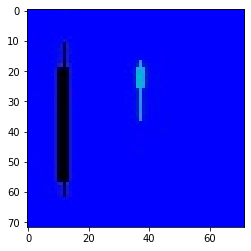

tf.Tensor([-0.01208306 -0.21610303 -0.45439816], shape=(3,), dtype=float32)


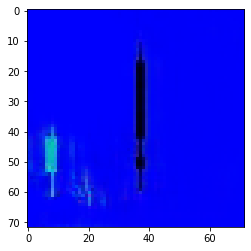

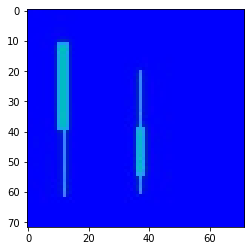

tf.Tensor([0.04157319 0.28196153 0.4540774 ], shape=(3,), dtype=float32)


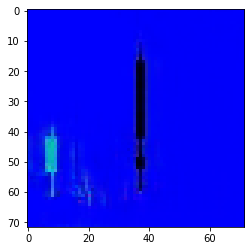

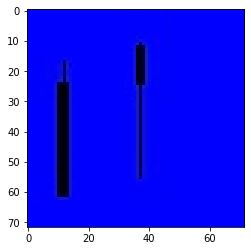

tf.Tensor([-0.09541032 -0.29906735 -0.3743328 ], shape=(3,), dtype=float32)


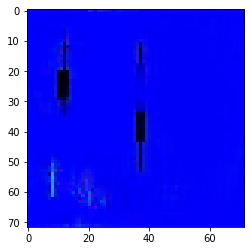

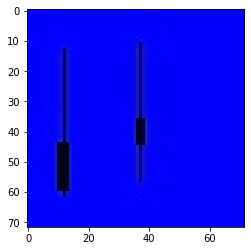

In [0]:
%cd /content

batch_size = 18
for i in range(10000):
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  X = x_train[idx]
  # X = np.random.normal(0,1,(batch_size,30,4))
  Y = y_train[idx] / 127.5 - 1

  if i % 100 == 0:
    clear_output()

  model.optimize(X, Y, batch_size)
  print(np.array(model.g_gradients)[-1])

  # print(i)
  if (i + 1) % 1 == 0:
    plt.imshow(((model.g.predict_on_batch(X)[0] + 1) * 127.5).astype(np.uint32))
    plt.show()
    plt.imshow(((Y[0] + 1) * 127.5).astype(np.uint32))
    plt.show()
  if (i + 1) % 100 == 0:
    model.save_weights("id_cgan/id_cgan")
    copy_tree("/content/id_cgan", "/content/drive/My Drive")

In [0]:
plt.imshow(x_train[idx][0])
plt.show()

In [0]:
np.mean(model.g.predict_on_batch(X)[0] == model.g.predict_on_batch(X)[1][:])

0.0

In [0]:
plt.imshow(((model.g.predict_on_batch(X).numpy()[0] + 1) * 127.5).astype(np.uint32))
plt.show()

In [0]:
# %cd /content
model.save_weights("id_cgan")

In [11]:
model.d(Y)

<tf.Tensor: shape=(18, 18, 18, 1), dtype=float32, numpy=
array([[[[0.5769767 ],
         [0.5624953 ],
         [0.55867374],
         ...,
         [0.58624065],
         [0.58624065],
         [0.57069665]],

        [[0.5379804 ],
         [0.5517278 ],
         [0.5505649 ],
         ...,
         [0.58168584],
         [0.58168584],
         [0.5865923 ]],

        [[0.5369375 ],
         [0.5468711 ],
         [0.58162415],
         ...,
         [0.58168584],
         [0.58168584],
         [0.5865923 ]],

        ...,

        [[0.7731242 ],
         [0.7759688 ],
         [0.6789469 ],
         ...,
         [0.44791985],
         [0.44791985],
         [0.45291972]],

        [[0.77786654],
         [0.7880938 ],
         [0.7726776 ],
         ...,
         [0.44791985],
         [0.44791985],
         [0.45291972]],

        [[0.822466  ],
         [0.78431463],
         [0.78431463],
         ...,
         [0.4376503 ],
         [0.4376503 ],
         [0.42863744]]],


   

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


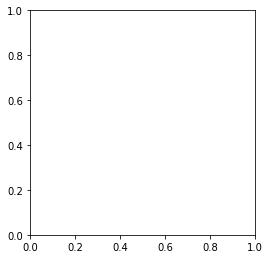

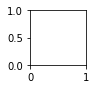

In [69]:
!pip install mpl_finance
%cd drive/My Drive

# import tensorflow as tf
from mpl_finance import candlestick2_ohlc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

df = pd.read_csv("gbpjpy15.csv")
x = np.array(df[["Close", "Open", "High", "Low"]])

# g = tf.keras.preprocessing.sequence.TimeseriesGenerator(x,x,20)
# x, y = [], []
# for i1,i2 in g:
#     x += i1.tolist()
#     y += i2.tolist()
x = np.array(x)[-15000:]
y = x[:]

fig1 = plt.figure(figsize=(4.03,4.13))
fig2 = plt.figure(figsize=(1,1))
ax1 = fig1.add_subplot(1,1,1)
ax2 = fig2.add_subplot(1,1,1)

image1 = []
image_time_x = []
image2 = []
image_label = []

window_size = 30
history_size = 2

for i in range(0, len(y)-window_size-history_size):
# for i in range(1):
    candlestick2_ohlc(ax1, x[i:i+window_size,1], x[i:i+window_size,2], x[i:i+window_size,3], x[i:i+window_size,0], width=0.5,alpha=1,colorup="r", colordown="b")
    image_time_x.append(x[i:i+window_size])
    i += window_size

    candlestick2_ohlc(ax2, x[i:i+history_size,1], x[i:i+history_size,2], x[i:i+history_size,3], x[i:i+history_size,0], width=0.1,alpha=1,colorup="k", colordown="y")
    
    label = 1 if x[i,0] > x[i-1,0] else 0
    image_label.append(label)
    
    ax1.axis("off")
    ax2.axis("off")

    # if x[i-1,-1,0] > x[i,-1,0]:
    #   color = "royalblue"
    # else:
    #   color = "salmon"

    fig1.savefig('forex1.jpg', bbox_inches='tight', pad_inches=0.0)
    fig2.savefig('forex2.jpg', pad_inches=0.0, facecolor="r", alpha=0.5)
# 
    ax1.cla()
    ax2.cla()

    im1 = cv2.imread("forex1.jpg")
    image1.append(im1)
    im2 = cv2.imread("forex2.jpg")
    image2.append(im2)

np.save("image_x", image1)
np.save("image_time_x", image_time_x)
np.save("image_y", image2)
np.save("image_label", image_label)

del image1, image2

(72, 72, 3)


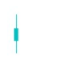

In [0]:
fig1 = plt.figure(figsize=(1,1))
ax1 = fig1.add_subplot(1,1,1)

ax1.cla()
i = 0
# x += 1
candlestick2_ohlc(ax1, x[i:i+history_size,1], x[i:i+history_size,2], x[i:i+history_size,3], x[i:i+history_size,0], width=0.1,alpha=1,colorup="k", colordown="y")
ax1.axis("off")
fig1.savefig('forex1.jpg', pad_inches=0.0)
im1 = cv2.imread("forex1.jpg")
print(im1.shape)
plt.imshow(im1)
plt.show()

In [0]:
import numpy as np
a = np.array(range(100))

In [0]:
w = a[0:30]
h = a[30:35]